In [1]:
from src.models.conjugate_bayes_lin_reg import FlatPriorLinearRegression
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
n = 100
p = 1

# Create design matrix and response
X = np.random.randn(n, p)
X = np.hstack((np.ones((n, 1)), X))
beta = np.array([1.0, 2.0]).reshape(-1, 1)
sigma = 1.0
y = X @ beta + np.random.randn(n).reshape(-1, 1) * sigma

# Fit the model
model = FlatPriorLinearRegression()
data = {'X': torch.tensor(X, dtype=torch.float32), 'y': torch.tensor(y, dtype=torch.float32)}
model.fit(data)


/home/rnaveiro/AdvReg/src/models/conjugate_bayes_lin_reg.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mu_ast = torch.tensor(v_ast @ X.T @ y, dtype=torch.float32)


In [37]:
# Predict
n_test = 50
X_test = np.random.randn(n_test, p)
X_test = np.hstack((np.ones((n_test, 1)), X_test))
y_test = X_test @ beta +  + np.random.randn(n_test).reshape(-1, 1) * sigma
predictive_dist = model.get_predictive_distribution(torch.tensor(X_test, dtype=torch.float32))
samples = predictive_dist.sample((10,))


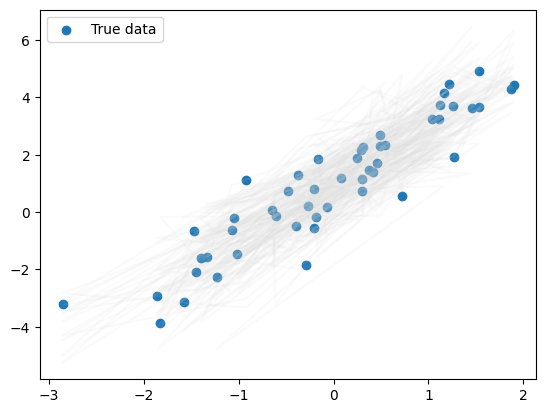

In [38]:

for i in range(samples.shape[0]):
    plt.plot(X_test[:, 1], samples[i,:].squeeze(), color='lightgray', alpha=0.1)
plt.scatter(X_test[:, 1], y_test, label='True data')
plt.legend()
plt.show()